### Problem Statement: Utilize Recurrent Neural Network (RNN) algorithms to perform sentiment analysis on a given dataset. Sentiment analysis involves determining the sentiment (positive, negative, or neutral) expressed in textual data. By implementing RNN models learn how to process sequential data and capture contextual information for sentiment classification.

#### we import the necessary libraries including pandas for data manipulation, numpy for numerical operations, re for regular expressions, nltk for natural language processing tasks, and keras for deep learning.

In [1]:
# Import necessary libraries
import pandas as pd # (Pandas is a powerful Python library for data manipulation and analysis.
    # It provides data structures like DataFrame and Series, which are highly efficient for handling structured data.
    # Functions for reading and writing data from/to various file formats such as CSV, Excel, SQL databases, etc.
    # Capabilities for data cleaning, manipulation, reshaping, merging, and grouping.
    # It's extensively used in data science and machine learning workflows for data preprocessing and exploratory data analysis (EDA).)

import numpy as np # (NumPy is a fundamental package for scientific computing in Python.
    # It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
    # NumPy arrays are more efficient than Python lists for numerical operations)


#### We download NLTK resources for tokenization and stop words.

#### We load the training and validation datasets using pandas.

In [2]:
# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/Data_Set/twitter_training.csv")
validation_data = pd.read_csv("/content/drive/MyDrive/Data_Set/twitter_validation.csv")

In [3]:
# Reset index and specify column names
train_data.reset_index(drop=True, inplace=True)
train_data.columns = ['ID', 'entity', 'sentiment', 'text']

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
train_data.head(10)

,ID,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


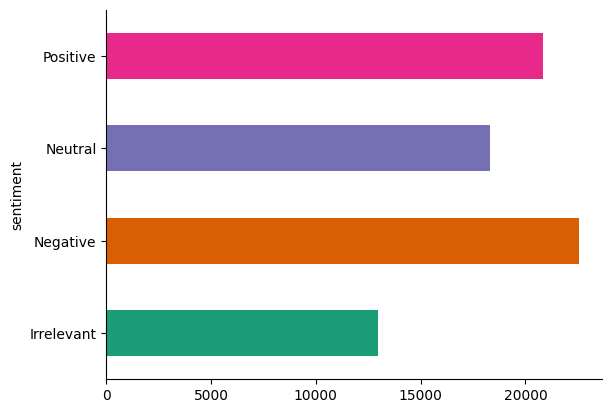

In [6]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
train_data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
# Reset index and specify column names
validation_data.reset_index(drop=True, inplace=True)
validation_data.columns = ['ID', 'entity', 'sentiment', 'text']

In [8]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         999 non-null    int64 
 1   entity     999 non-null    object
 2   sentiment  999 non-null    object
 3   text       999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


In [9]:
validation_data.head(10)

,ID,entity,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


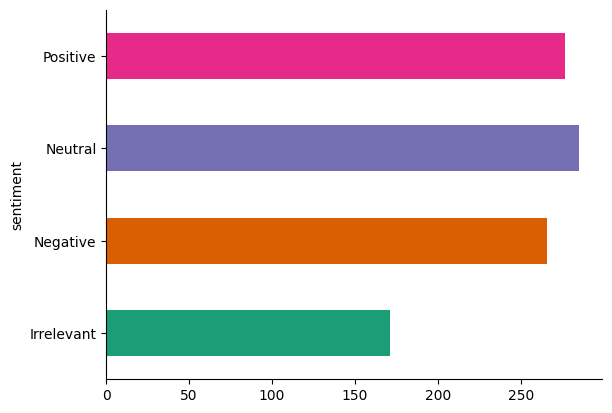

In [10]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
validation_data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [11]:
# Concatenate train and validation datasets for preprocessing
full_data = pd.concat([train_data, validation_data], axis=0)

In [12]:
# Reset index after concatenating
full_data.reset_index(drop=True, inplace=True)

In [13]:
full_data.shape

(75680, 4)

In [14]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         75680 non-null  int64 
 1   entity     75680 non-null  object
 2   sentiment  75680 non-null  object
 3   text       74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [15]:
##Drop Nan Values
full_data=full_data.dropna()
full_data.shape

(74994, 4)

In [16]:
# Filter out irrelevant and neutral sentiments
filtered_data = full_data[(full_data['sentiment'] == 'Positive') | (full_data['sentiment'] == 'Negative')]

# Reset index after filtering
filtered_data.reset_index(drop=True, inplace=True)

# Print the shape of the filtered dataset
print("filtered_data.shape:", filtered_data.shape)


filtered_data.shape: (43555, 4)


In [17]:
import re #(The re module provides support for working with regular expressions in Python.
    # Regular expressions are a powerful tool for pattern matching and manipulation of strings.
    # It allows you to search, match, and manipulate text using complex patterns, which is especially useful for tasks like text preprocessing, extraction, and validation.)

import nltk # (NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data.
    # It provides easy-to-use interfaces to over 50 corpora and lexical resources, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.
    # NLTK is widely used in natural language processing (NLP) tasks, including sentiment analysis, text classification, machine translation, and information extraction.)

from nltk.corpus import stopwords # (NLTK provides a collection of stopwords for various languages.
    # Stopwords are common words that are often filtered out during text preprocessing because they typically do not contribute much to the meaning of the text (e.g., "the", "is", "and").
    # Removing stopwords can improve the performance of text analysis tasks by reducing noise and focusing on more meaningful words.)

from nltk.tokenize import word_tokenize # (This function is used to tokenize (split) a text into individual words or tokens.
    # Tokenization is a crucial step in natural language processing tasks, as it breaks down text into smaller units that can be further analyzed or processed.)


In [18]:
# Download NLTK resources
nltk.download('punkt') # The Punkt tokenizer is a pre-trained unsupervised machine learning model used for sentence tokenization.
# Sentence tokenization is the process of splitting text into individual sentences.
# Punkt is particularly useful because it's trained on a large corpus of text and is capable of tokenizing sentences in multiple languages accurately.
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.stem.porter import PorterStemmer # For each word in the tokenized text, it applies stemming using the PorterStemmer object ps.
# Additionally, it checks if the word is not in NLTK's English stopwords list and only keeps those words.
# The Porter Stemmer is a stemming algorithm used to reduce words to their root form.

# Initialize Porter Stemmer
ps = PorterStemmer()
corpus = []

for i in range(0, len(filtered_data)):
    print(i)
    print(filtered_data['text'][i])
    review = filtered_data['text'][i]

    # Remove URLs, mentions, special characters, punctuation, and convert text to lowercase
    review = re.sub(r'http\S+', '', review)  # Remove URLs
    review = re.sub(r'@\w+', '', review)     # Remove mentions
    review = re.sub('[^a-zA-Z]', ' ', review) # Remove special characters and punctuation
    review = review.lower()                  # Convert text to lowercase

    # Tokenize the text, Splits the preprocessed text into individual words, creating a list of tokens.
    review = review.split()

    # Applies stemming to each word in the tokenized text using the Porter Stemmer (ps).
    # Additionally, it checks if the word is not in NLTK's English stopwords list and only keeps those words.
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]

    review = ' '.join(review) # Joins the stemmed words back into a single string, separated by spaces.
    corpus.append(review) # append the preprocessed text to the corpus list after all preprocessing steps are completed for each text.


Streaming output truncated to the last 5000 lines.
 
41188
It is not the first time that the EU Commission has taken such a step.
41189
At the same time, despite the fact that there are currently some 100 million people living below the poverty line, most of them do not have access to health services and do not have access to health care, while most of them do not have access to health care.
41190
@GhostRecon . Problem with class selection i have season pass but i can't select it
41191
@ GhostRecon. Problem with class selection I have season ticket, but I can not select them.
41192
@ GhostRecon. With class choice I have a subscription but I can't choose it
41193
@GhostRecon. Problem some class selection i have season pass but i can't select it
41194
@GhostRecon. Problem with team class selection i do have the season pass but i can'd t select it
41195
<unk>. Problem with class selection i have season pass test i want't select it
41196
I maintain a  . This is a no-brainer for me.
41197
F

In [20]:
corpus

['come border kill',
 'im get borderland kill',
 'im come borderland murder',
 'im get borderland murder',
 'im get borderland murder',
 'spent hour make someth fun know huge fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg',
 'spent coupl hour someth fun know huge borderland fan maya one favorit charact decid make wallpap pc origin pictur compar creation made fun pic twitter com mlsi wf jg',
 'spent hour someth fun know huge borderland fan maya one favorit charact',
 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg',
 'spent hour make someth fun know huge rhandlerr fan maya one favorit charact decid make wallpap pc origin imag versu creation made enjoy pic twitter com mlsi wf jg',
 '',
 'first borderland session long time actual realli satisfi combat experi got realli good kill',
 'first borderland session

### Onehot Representation

In [21]:
from keras.preprocessing.text import one_hot

### Vocabulary size
voc_size=5000

onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[2185, 466, 2355],
 [2244, 30, 2551, 2355],
 [2244, 2185, 2551, 944],
 [2244, 30, 2551, 944],
 [2244, 30, 2551, 944],
 [2447,
  4604,
  2840,
  2866,
  2054,
  99,
  2515,
  2201,
  1477,
  2862,
  2933,
  2822,
  1502,
  2840,
  3741,
  4355,
  1884,
  833,
  984,
  290,
  4573,
  1854,
  2065,
  4708,
  943,
  3725,
  435,
  1465],
 [2447,
  563,
  4604,
  2866,
  2054,
  99,
  2515,
  2551,
  2201,
  1477,
  2862,
  2933,
  2822,
  1502,
  2840,
  3741,
  4355,
  1884,
  168,
  298,
  290,
  4573,
  2054,
  2065,
  4708,
  943,
  3725,
  435,
  1465],
 [2447, 4604, 2866, 2054, 99, 2515, 2551, 2201, 1477, 2862, 2933, 2822],
 [2447,
  4604,
  2840,
  2866,
  2054,
  99,
  2515,
  1127,
  2201,
  1477,
  2862,
  2933,
  2822,
  1502,
  2840,
  3741,
  4355,
  1884,
  833,
  984,
  290,
  4573,
  1854,
  2065,
  4708,
  943,
  3725,
  435,
  1465],
 [2447,
  4604,
  2840,
  2866,
  2054,
  99,
  2515,
  1127,
  2201,
  1477,
  2862,
  2933,
  2822,
  1502,
  2840,
  3741,
  4355,
  188

In [22]:
# To check the length of the longest sequence in a list of sequences, you can iterate over each sequence and keep track of the maximum length encountered.
sequences = onehot_repr

# Initialize maximum length
max_length = 0

# Iterate over each sequence
for seq in sequences:
    # Update maximum length if current sequence is longer
    max_length = max(max_length, len(seq))

print("Maximum length:", max_length)


Maximum length: 163


In [23]:
from keras.preprocessing.text import Tokenizer #( Tokenizer from Keras is used for tokenizing text documents into sequences of integers.
   # It assigns a unique integer index to each word in the vocabulary and converts each text document into a sequence of these indices.
   # This is a common preprocessing step before feeding text data into deep learning models.)
from keras.preprocessing.sequence import pad_sequences # The pad_sequences function from the Keras preprocessing module is used to ensure that all sequences in a dataset have the same length by either padding or truncating them.
# This is often necessary when working with sequence data, especially when training neural network models that require fixed-length input sequences.


sent_length=163
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 2185  466 2355]
 [   0    0    0 ...   30 2551 2355]
 [   0    0    0 ... 2185 2551  944]
 ...
 [   0    0    0 ... 3237 2712 1367]
 [   0    0    0 ... 1376 1181 3478]
 [   0    0    0 ... 4558 1677  875]]


In [24]:
embedded_docs[6]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 2447,  563, 4604, 2866, 2054,   99, 2515, 2551, 2201,
       1477, 2862, 2933, 2822, 1502, 2840, 3741, 43

In [25]:
filtered_data.head()

,ID,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [26]:
print(filtered_data['sentiment'].unique())

['Positive' 'Negative']


In [27]:
from sklearn.model_selection import train_test_split # (From scikit-learn, this function is used for splitting datasets into train and test sets.
    # It randomly shuffles and splits the input data into two subsets: one for training the model and the other for evaluating its performance.
    # This is essential for assessing how well a machine learning model generalizes to unseen data.)

from sklearn.preprocessing import LabelEncoder # (LabelEncoder is used to encode categorical labels into numerical format.
    # It assigns a unique integer to each category in the input data, making it suitable for use with machine learning algorithms that require numerical input.)


In [28]:
# Encoding sentiment labels : Initialize label encoder
label_encoder = LabelEncoder()
# Fit label encoder on sentiment labels
label_encoder.fit(filtered_data ['sentiment'])
# Encode sentiment labels
encoded_labels = label_encoder.transform(filtered_data ['sentiment'])

In [29]:
encoded_labels_series = pd.Series(encoded_labels)
unique_labels = encoded_labels_series.unique()
print(unique_labels)

[1 0]


In [30]:
len(embedded_docs),encoded_labels.shape

(43555, (43555,))

In [31]:
X_final=np.array(embedded_docs)
y_final=np.array(encoded_labels)

In [32]:
X_final.shape,y_final.shape

((43555, 163), (43555,))

In [33]:
# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# Check the shapes of the preprocessed data
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (19551, 163)
X_val shape: (9630, 163)
y_train shape: (19551,)
y_val shape: (9630,)


In [34]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Define the maximum number of words and embedding dimension
MAX_WORDS = voc_size
EMBEDDING_DIM = 100

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=sent_length))
model.add(SimpleRNN(units=64))  # Simple RNN layer with 64 units
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 163, 100)          500000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 510625 (1.95 MB)
Trainable params: 510625 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
# Define hyperparameters
batch_size = 200
epochs = 10

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)

Epoch 1/10
98/98 [==============================] - 17s 151ms/step - loss: 0.6029 - accuracy: 0.6672 - val_loss: 0.4484 - val_accuracy: 0.8073
Epoch 2/10
98/98 [==============================] - 14s 148ms/step - loss: 0.3137 - accuracy: 0.8703 - val_loss: 0.3223 - val_accuracy: 0.8613
Epoch 3/10
98/98 [==============================] - 15s 150ms/step - loss: 0.1865 - accuracy: 0.9273 - val_loss: 0.3046 - val_accuracy: 0.8710
Epoch 4/10
98/98 [==============================] - 14s 138ms/step - loss: 0.1392 - accuracy: 0.9488 - val_loss: 0.3047 - val_accuracy: 0.8782
Epoch 5/10
98/98 [==============================] - 15s 149ms/step - loss: 0.0903 - accuracy: 0.9654 - val_loss: 0.3203 - val_accuracy: 0.8778
Epoch 6/10
98/98 [==============================] - 15s 149ms/step - loss: 0.0864 - accuracy: 0.9659 - val_loss: 0.3364 - val_accuracy: 0.8760
Epoch 7/10
98/98 [==============================] - 16s 161ms/step - loss: 0.0674 - accuracy: 0.9725 - val_loss: 0.3571 - val_accuracy: 0.8787

In [36]:
# Evaluate the model on the trainig set
traing_loss, traing_accuracy = model.evaluate(X_train, y_train, batch_size=batch_size)
print("Training Loss:", traing_loss)
print("Training Accuracy:", traing_accuracy)

98/98 [==============================] - 3s 34ms/step - loss: 0.9138 - accuracy: 0.6656
Training Loss: 0.9138127565383911
Training Accuracy: 0.6656436920166016


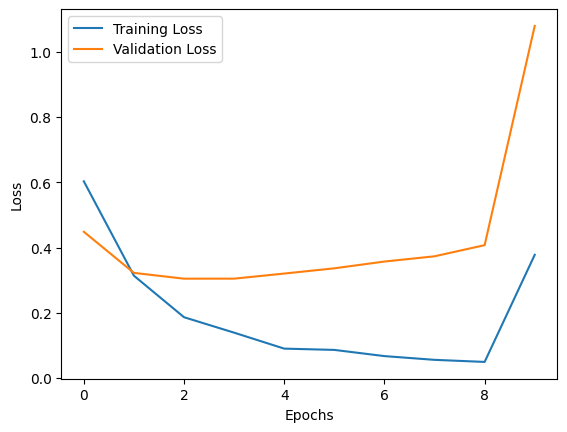

In [37]:
# Visualize training metrics
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, batch_size=batch_size)
print("Validation Loss:", val_loss)
print("validation Accuracy:", val_accuracy)

49/49 [==============================] - 2s 49ms/step - loss: 1.0791 - accuracy: 0.6258
Validation Loss: 1.0790600776672363
validation Accuracy: 0.625752866268158


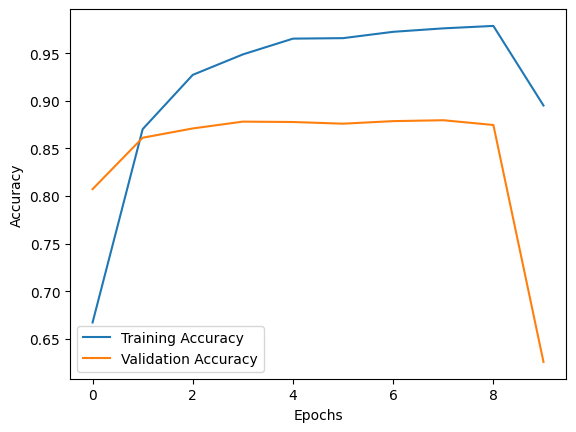

In [39]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [40]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

72/72 [==============================] - 3s 41ms/step - loss: 1.0871 - accuracy: 0.6272
Test Loss: 1.0870620012283325
Test Accuracy: 0.6271740794181824


In [41]:
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Applying threshold of 0.5 for binary classification

# y_pred_classes is now an array of predicted classes for each sample in X_test


450/450 [==============================] - 5s 11ms/step


In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred_classes)

array([[2341, 5097],
       [ 262, 6674]])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_classes)

0.6271740642827327

### Tuning the Hyperparameters

In [44]:
!pip install scikeras

In [45]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier

In [46]:
# Define RNN model


# Creates a model given an activation and learning rate
def create_model(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'],
                 batch_size=32, validation_batch_size=None, verbose=1, callbacks=None,
                 validation_split=0.0, shuffle=True, run_eagerly=None, epochs=1, class_weight=None):

    model1 = Sequential()
    model1.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=sent_length))
    model1.add(LSTM(units=64))
    model1.add(Dense(units=1, activation='sigmoid'))
    model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model1

In [47]:
# Create KerasClassifier wrapper for use with GridSearchCV
model1 = KerasClassifier(model=create_model, verbose=0)
model1

KerasClassifier(
	model=<function create_model at 0x7c9480410ee0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	class_weight=None
)

In [48]:
# Define hyperparameters for grid search
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'batch_size': [100, 200],
    'epochs': [10, 20],
}

In [49]:
# Perform grid search
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

In [50]:
# Get the best hyperparameters
best_params = grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'batch_size': 100, 'epochs': 20, 'optimizer': 'rmsprop'}


In [51]:
# Evaluate the model with the best hyperparameters on the test set
best_model = grid.best_estimator_
best_model

KerasClassifier(
	model=<function create_model at 0x7c9480410ee0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=100
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

In [52]:
# Train the model
history1 = best_model.fit(X_train, y_train, validation_data=(X_val, y_val))

In [ ]:
y_pred_probs1 = best_model.predict(X_test)
y_pred_classes1 = (y_pred_probs1 > 0.5).astype(int)  # Applying threshold of 0.5 for binary classification

# y_pred_classes is now an array of predicted classes for each sample in X_test
